# **Object Detection using DETR (Detection Transformer)**

## **Overview**

In this project, we are using a state-of-the-art object detection model, DETR (Detection Transformer), to identify objects within an image. DETR is a unique approach that combines the power of transformers with CNNs to provide accurate object detection in an end-to-end fashion.

## **Step by step code explanation**

### 1. Import the libraries

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### 2. Load the image

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

### 3. Load the model and processor

We load the DetrImageProcessor and DetrForObjectDetection from the transformers library. The processor prepares the image, and the model is pre-trained on a large dataset (COCO) to detect objects in images.

In [ ]:
# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

### 4. Preprocess the image

The image is preprocessed by the processor, converting it into a tensor format suitable for the model. This includes resizing, normalizing, and converting the image to a PyTorch tensor.

In [ ]:
inputs = processor(images=image, return_tensors="pt")

### 5. Model inference

The preprocessed image tensor is fed into the DETR model, which outputs predictions including bounding boxes, class labels, and confidence scores.

In [ ]:
outputs = model(**inputs)

### 6. Post-processing the results

The raw outputs from the model are converted into human-readable results using the post_process_object_detection method. This step includes filtering out detections with a confidence score below 0.9.

In [7]:
# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


### 7. Visualizing the detections

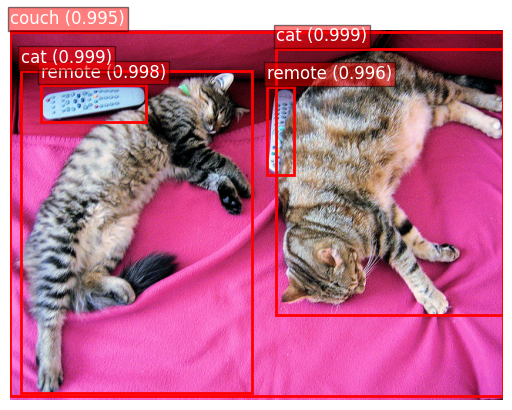

In [10]:
# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Add rectangles and labels for each detected object
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    # Add label and confidence score
    ax.text(x1, y1 - 10, f"{model.config.id2label[label.item()]} ({round(score.item(), 3)})", color='white', fontsize=12, 
            bbox=dict(facecolor='red', alpha=0.5, pad=2))

plt.axis('off')  # Turn off the axis
plt.show()